<a href="https://colab.research.google.com/github/FariusGitHub/DataScience/blob/master/bell2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

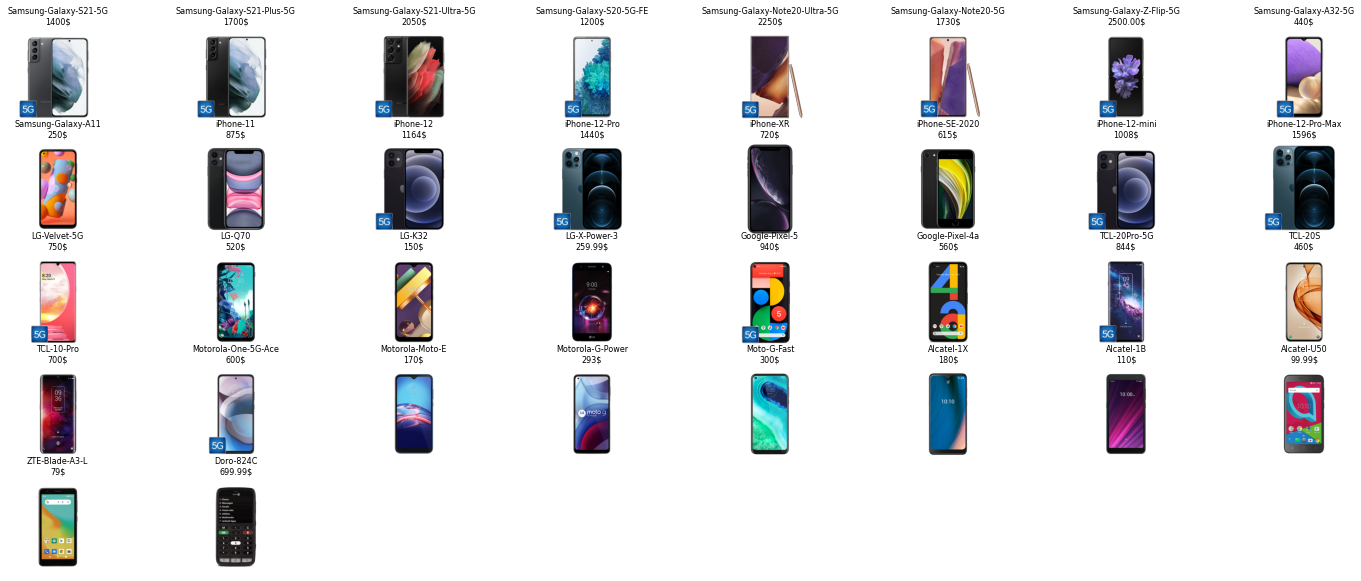

In [ ]:
import re
import urllib.request    
import matplotlib.pyplot as plt
import matplotlib.image as img
from tqdm.notebook import tqdm

urllib.request.urlretrieve("https://www.bell.ca/Mobility/Smartphones_and_mobile_internet_devices", "test.txt")

#EXTRACTING THE PRICES
plist = []
with open("test.txt", "r") as file:
    for line in file.readlines():
        match = re.search(r'dl-tile-full-price"(.+)">', line)
        if match:
            plist.append(match.group(1)[-10:].split(' ')[1])
            
#EXTRACTING IMAGE URLS
glist = []
with open("test.txt", "r") as file:
    for line in file.readlines():
        match = re.search('dl-tile-img', line)
        if match:
            graphic=line.split('" alt="">')[0].split('<img class="dl-tile-img" data-src="')[1]
            glist.append('https://www.bell.ca'+graphic)

#EXTRACTING DESCRIPTION
dlist = []
with open("test.txt", "r") as file:
    for line in file.readlines():
        match = re.search('/Mobility/Products/', line)
        if match:
            desc=line.split('?INT=MOB')[0].split('Mobility/Products/')[1]
            dlist.append(desc)

# Combining desc and image, dumping prepaid
dlist2=[]
glist2=[]
for i in range(len(dlist)):
    if dlist[i][-7:]!='Prepaid':
        count+=1
        dlist2+=[dlist[i]]
        glist2+=[glist[i]]
dgdic=dict(zip(dlist2,glist2))

#REPORTING        
fig = plt.figure(figsize=(25,10))
for i in tqdm(range(1,len(dgdic)+1)):
    plt.subplot(5,8,i)
    plt.imshow(img.imread(list(dgdic.values())[i-1]))
    plt.title(list(dgdic.keys())[i-1]+'\n'+plist[i-1], fontsize=8)
    plt.axis('off')    